<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Открытие-файла" data-toc-modified-id="Открытие-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие файла</a></span></li><li><span><a href="#Вывод-первых-десяти-строк-таблицы" data-toc-modified-id="Вывод-первых-десяти-строк-таблицы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод первых десяти строк таблицы</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренд и сезонность</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Разбиение-данных-на-целевой-признак-и-признаки" data-toc-modified-id="Разбиение-данных-на-целевой-признак-и-признаки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разбиение данных на целевой признак и признаки</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

**Цель исследования** — построить модель для прогноза количества заказов такси на следующий час, метрика RMSE которой на тестовой выборке будет не больше 48.

**Ход исследования:**
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

## Подготовка

### Импорт необходимых библиотек

In [1]:
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

### Открытие файла

In [2]:
try:
    data = pd.read_csv('/datasets/taxi.csv', engine='python', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', engine='python', index_col=[0], parse_dates=[0])

In [3]:
data.sort_index(inplace=True)

### Вывод первых десяти строк таблицы

In [4]:
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


### Ресемплирование

Выполним ресемплирование данных по одному часу:

In [5]:
data = data.resample('1H').sum()

### Вывод

Согласно документации к данным:
* `num_orders` — количество заказов такси,
* `datetime` — время заказов.

`num_orders` является целевым признаком. Необходимо проанализировать временной ряд, создать признаки, после чего перейти к обучению моделей.

## Анализ

### Тренд и сезонность

Проанализируем данные с помощью тренда и сезонности. Разложим весь временной ряд на тренд:

In [6]:
decomposed = seasonal_decompose(data)

Text(0.5, 1.0, 'Trend')

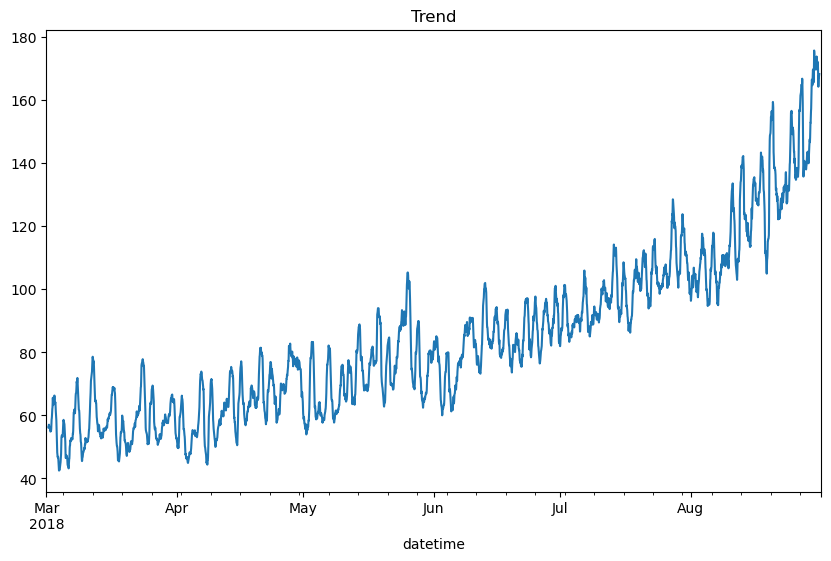

In [7]:
plt.figure(figsize=(10, 6))
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

В данном случае тренд восходящий. Построим график сезонности за первые три дня в данных:

Text(0.5, 1.0, 'Seasonality')

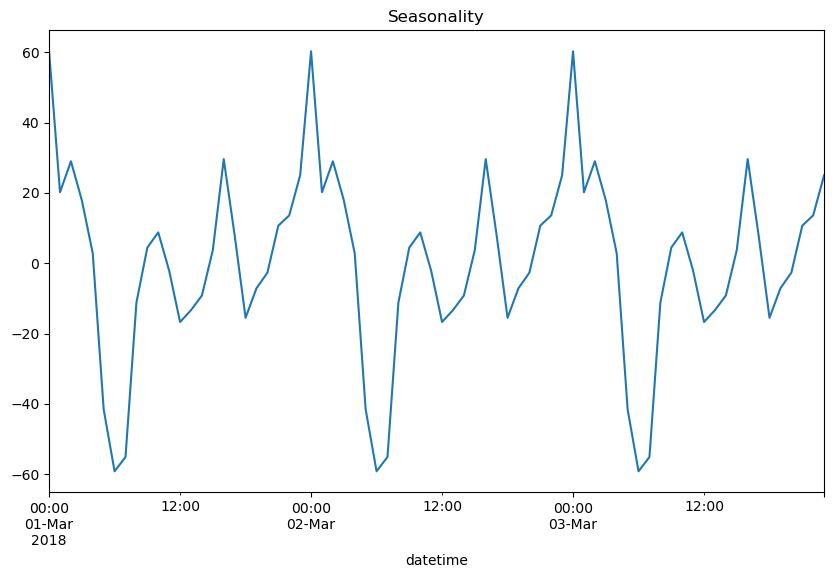

In [8]:
plt.figure(figsize=(10, 6))
decomposed.seasonal['2018-03-01':'2018-03-03'].plot(ax=plt.gca()) 
plt.title('Seasonality')

На графике сезонности видно, что количество заказов меньше всего в 06:00, а больше всего в 00:00. Паттерн повторяется ежедневно.

### Создание признаков

Создадим такие признаки, как день недели, час, отстающее значение и скользящее среднее:

In [10]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 168, 168)

C:\Users\sushi\AppData\Local\Temp\ipykernel_21124\2635838501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\sushi\AppData\Local\Temp\ipykernel_21124\2635838501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\sushi\AppData\Local\Temp\ipykernel_21124\2635838501.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

### Вывод

Графики тренда и сезонности показывают восходящий тренд и ежедневные увеличения количества заказов в 00:00 и уменьшения — в 06:00. 

Перед обучением моделей временной ряд был преобразован в стационарный, и были созданы признаки: день недели, час, отстающее значение и скользящее среднее.

## Обучение

### Разбиение данных на выборки

Разделим данные на обучающую и тестовую выборку в отношении 9:1:

In [11]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

### Разбиение данных на целевой признак и признаки

In [12]:
features_train = train.drop(['num_orders'], axis=1)
features_test = test.drop(['num_orders'], axis=1)
target_train = train['num_orders']
target_test = test['num_orders']

### Линейная регрессия

Обучим модель линейной регрессии:

In [13]:
reg_features_train, reg_features_valid, reg_target_train, reg_target_valid = train_test_split(
    features_train, target_train, test_size=0.25, shuffle=False)

reg_model = LinearRegression()
reg_model.fit(reg_features_train, reg_target_train)
reg_pred = reg_model.predict(reg_features_valid)

print('Метрика RMSE для линейной регрессии на валидационной выборке:', mean_squared_error(
    reg_target_valid, reg_pred, squared=False))

Метрика RMSE для линейной регрессии на валидационной выборке: 26.414544084544314


### LightGBM

In [14]:
tscv = TimeSeriesSplit(n_splits=10)

С помощью кросс-валидации подберем гиперпараметры для модели LightGBM и обучим лучшую модель:

In [15]:
light_regressor = lgb.LGBMRegressor(random_state=12345)

params = {'n_estimators' : range(10, 20, 1),
             'max_depth' : range(10, 20, 1)}

grid = RandomizedSearchCV(light_regressor, params, cv=tscv, scoring='neg_root_mean_squared_error', n_iter=5)
grid.fit(features_train, target_train)

light_regressor = grid.best_estimator_

print(light_regressor)
print('Метрика RMSE для модели LightGBM на валидационной выборке:', grid.best_score_ * (-1))

LGBMRegressor(max_depth=11, n_estimators=19, random_state=12345)
Метрика RMSE для модели LightGBM на валидационной выборке: 23.101860077372454


### Случайный лес

С помощью кросс-валидации подберем гиперпараметры для модели случайного леса и обучим лучшую модель:

In [16]:
forest_model = RandomForestRegressor(random_state=12345)

params = {'n_estimators' : range(10, 20, 1),
             'max_depth' : range(10, 20, 1)}

grid = RandomizedSearchCV(forest_model, params, cv=tscv, scoring='neg_root_mean_squared_error', n_iter=5, n_jobs=-1)
grid.fit(features_train, target_train)

forest_model = grid.best_estimator_

print(forest_model)
print('Метрика RMSE для случайного леса на валидационной выборке:', grid.best_score_ * (-1))

RandomForestRegressor(max_depth=10, n_estimators=16, random_state=12345)
Метрика RMSE для случайного леса на валидационной выборке: 22.70917869191173


### Вывод

Для выбора лучшей модели были обучены линейная регрессия, случайный лес и LightGBM. С помощью кросс-валидации для моделей случайного леса и LightGBM были подобраны такие гиперпараметры, при которых метрика RMSE минимальна.

## Тестирование

In [20]:
final_pred = forest_model.predict(features_test)
print('RMSE модели LightGBM на тестовой выборке:', mean_squared_error(
    target_test, final_pred, squared=False))

RMSE модели LightGBM на тестовой выборке: 40.01152072358435


### Вывод

Минимальную метрику RMSE показала модель случайного леса — она равна примерно 22.7. Модели случайного леса и линейной регрессии показали наибольшую метрику. 

## Вывод

На этапе анализа были рассмотрены тренд и сезонность. Временной ряд был преобразован в стационарный, были созданы признаки для последующей работы с моделями. 

Для выбора наилучшей модели были представлены модели линейной регрессии, случайного леса и LightGBM. С помощью кросс-валидации для них были подобраны гиперпараметры таким образом, чтобы метрика RMSE была минимальной. 

На валидационной выборке лучшим показателем RMSE обладает модель случайного леса. На тестовой выборке ее метрика RMSE составила около 40.